In [1]:
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
sns.set()
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [4]:
img = cv2.imread("4.jpg")

In [5]:
# cv2.imshow('Original Image', img)
# cv2.waitKey(10000)
# cv2.destroyAllWindows()

In [6]:
h,w = img.shape[0:2]

In [7]:
T = [4, 10, 15, 25, 40, 90, 125, 160, 200]

In [8]:
# 4.jpg is the smallest picture. So, we crop all others to its size.
for index in T:
    img = cv2.imread(f"{index}.jpg")
    cropped = img[0:h, 0:w]
    cv2.imwrite(f"{index}-p.jpg", cropped)
    

In [9]:
channels = {} # average channel values for each picture. key = inverse exposure time.
cB = [] # average channel Blue value accross all pictures.
cG = []
cR = []
for index in T:
    img = cv2.imread(f"{index}-p.jpg")
    b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b = np.mean(b)
    g = np.mean(g)
    r = np.mean(r)
    channels[index] = (b, g, r)
    cB.append(b)
    cG.append(g)
    cR.append(r)
    print(f"{index}-p.jpg r:{r}, g:{g}, b:{b}")

4-p.jpg r:238.05122085048012, g:222.7633196159122, b:204.29733882030177
10-p.jpg r:201.50075445816188, g:185.0356241426612, b:169.11200274348423
15-p.jpg r:167.94796982167352, g:155.29267489711935, b:139.71318244170095
25-p.jpg r:133.68124828532237, g:123.83524005486969, b:111.73971193415638
40-p.jpg r:99.42213991769547, g:92.35936899862826, b:81.27004115226337
90-p.jpg r:59.75310013717421, g:53.705884773662554, b:47.52319615912209
125-p.jpg r:41.337475994513035, g:36.461001371742114, b:30.440438957475994
160-p.jpg r:34.569533607681755, g:30.392894375857338, b:25.679355281207133
200-p.jpg r:15.265020576131688, g:14.543319615912209, b:10.404266117969822


In [10]:
Ts = [1/t for t in T]
    

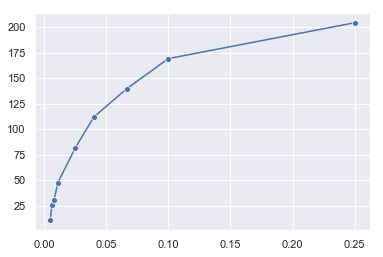

In [11]:
sns.lineplot(x = Ts, y = cB, marker='o')

In [12]:
logTs = np.array(np.log(Ts))
logB = np.array(np.log(cB))
logG = np.array(np.log(cG))
logR = np.array(np.log(cR))

[Text(0,0.5,"log B'"), Text(0.5,0,'log T(s)')]

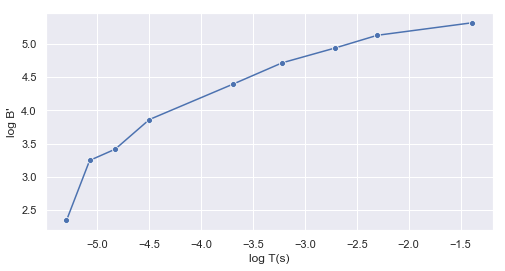

In [21]:
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x = logTs, y = logB, marker='o')
# ax = sns.lineplot(x = logTs, y = logG, marker='o', color='g')
# ax = sns.lineplot(x = logTs, y = logR, marker='o', color='r')

ax.set(xlabel='log T(s)', ylabel='log B\'')

In [22]:
################## Regression
def getG(logTime, logChannel):
    model = LinearRegression().fit(logTime.reshape(-1, 1), logChannel)
    return (1 / model.coef_[0])

In [23]:
gB = getG(logTs, logB)
gG = getG(logTs, logG)
gR = getG(logTs, logR)

In [24]:
linearB = np.power(cB, gB)
linearG = np.power(cG, gG)
linearR = np.power(cR, gR)

[Text(0,0.5,"B'"), Text(0.5,0,'T(s)')]

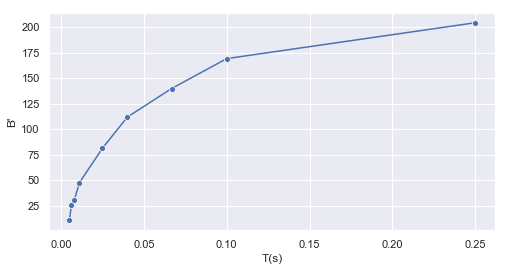

In [34]:
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x = Ts, y = cB, marker='o')
# ax = sns.lineplot(x = Ts, y = cG, marker='o', color='g')
# ax = sns.lineplot(x = Ts, y = cR, marker='o', color='r')
ax.set(xlabel='T(s)', ylabel='B\'')

# ax = sns.lineplot(x = Ts, y = linearB, marker='o')
# ax = sns.lineplot(x = Ts, y = linearG, marker='o', color='g')
# ax = sns.lineplot(x = Ts, y = linearR, marker='o', color='r')
# ax.set(xlabel='T(s)', ylabel='B\'^g')

In [31]:
print(f'gB = {gB}')
print(f'gG = {gG}')
print(f'gR = {gR}')

gB = 1.4400324117846943
gG = 1.5335689920700644
gR = 1.5526529746220272
